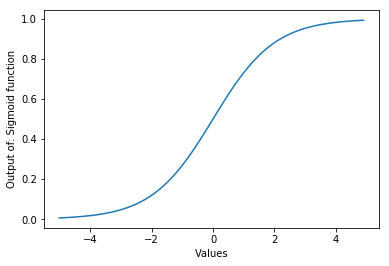

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid_function(values):
    af = 'Sigmoid function'
    result = 1 / (1 + np.exp(-values))
    
    plt.plot(values, result)
    plt.xlabel('Values')
    plt.ylabel('Output of: '+af)
    plt.show()

input_values = np.arange(-5,5,.1)
sigmoid_function(input_values)

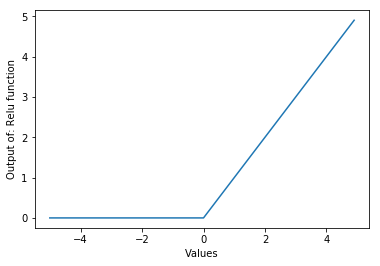

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def relu_function(values):
    af = 'Relu function'
    result = np.maximum(0,values)
    
    plt.plot(values, result)
    plt.xlabel('Values')
    plt.ylabel('Output of: '+af)
    plt.show()

input_values = np.arange(-5,5,.1)
relu_function(input_values)

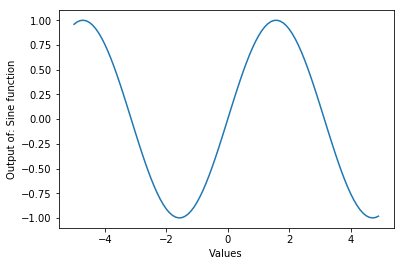

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def activation_function(values, function_type):
    
    if function_type == 1:
        af = 'Sigmoid function'
        result = 1 / (1+np.exp(-values))
    
    elif function_type == 2:
        af = 'tan-hyperbolic function'
        result = (np.exp(values)-np.exp(-values))/(np.exp(values)+np.exp(-values))
        
    elif function_type == 3:
        af = 'Identity function'
        result = values
    
    elif function_type == 4:
        af = 'Exponential function'
        result = np.exp(-values)
    
    elif function_type == 5:
        af = 'Sine function'
        result = np.sin(values)
    
    elif function_type == 6:
        af = 'Square root function'
        result = np.sqrt(values)
    
    elif function_type == 7:
        af = 'Step function'
        result = np.heaviside(values,1)
        
    elif function_type == 8:
        af = 'Relu function'
        result = values * (values > 0)
        
    plt.plot(values, result)
    plt.xlabel('Values')
    plt.ylabel('Output of: '+af)
    plt.show()
    
    
input_values = np.arange(-5,5,.1)
activation_function(input_values, 5)

In [4]:
import numpy as np

def sig(value):
    result = 1 / (1 + np.exp(-value))
    return result

def dif_sig(value):
    result = sig(value) * (1 - sig(value))
    return result

def neural_net(train_ip, train_op):
    
    init_wt = 2 * np.random.random((3,1)) -1
    
    for i in range(80000):
        
        sum_fn = np.dot(train_ip, init_wt)
        opt = sig(sum_fn)
        
        err = train_op - opt
        sol = err * dif_sig(opt)
        init_wt += np.dot(train_ip.T, sol)
        
    return init_wt

def test(inp_lst):
    inp_arr = np.array(inp_lst)
    opt = sig(np.dot(inp_arr, weight)) 
    return opt

X = np.array([[1,0,0], [1,1,1], [0,0,1], [0,1,1], [1,1,0]])
Y = np.array([[1, 1, 0, 0, 1]]).T

weight = neural_net(X,Y)
print(weight)
print('--------------------')
print(test([1,0,1]))

[[18.18768208]
 [ 0.67676609]
 [-9.8924036 ]]
--------------------
[0.99975037]


In [5]:
import numpy as np

def sig(value):
    result = 1 / (1 + np.exp(-value))
    return result

def dif_sig(value):
    result = sig(value) * (1 - sig(value))
    return result

def neural_net(train_ip, train_op):
    
    init_wt = 2 * np.random.random((train_ip.shape[1], 1)) -1
    
    for i in range(10000):
        
        sum_fn = np.dot(train_ip, init_wt)
        opt = sig(sum_fn)
        
        err = train_op - opt
        sol = err * dif_sig(opt)
        init_wt += np.dot(train_ip.T, sol)
        
    return init_wt

def test(inp_lst):
    inp_arr = np.array(inp_lst)
    opt = sig(np.dot(inp_arr, weight)) 
    return opt

X = np.array([[5.4, 63], [6.0, 76], [5.4, 55], [6.0, 68], [5.8, 71]])
Y = np.array([[1, 1, 0, 0, 1]]).T

weight = neural_net(X,Y)
print(weight)
print('--------------------')
print(test([5.8, 68]))

[[-188.80041679]
 [  16.4289925 ]]
--------------------
[1.]


In [6]:
import numpy as np

#initializing random weights
weight1 = np.array([[0.3, 0.3, 0.3], [0.5, 0.5, 0.5], [0.7, 0.7, 0.7]])
weight2 = np.ones((1,3)) * 0.6

#initializing random biases
bias1 = np.array([10, 10, 10])
bias2 = np.array([100])

# defining relu function
def relu(value):
    result = value * (value > 0)
    return result

In [7]:
#forward feed mechanism:
def fwd_feed(layers, inputs, weights, bias):
    
    for i in range(layers - 1):
        
        #initializing inputs and outputs:
        
        if i == 0:
            value_in = inputs
        else:
            value_in = value_out
            
        value_out = np.zeros((weights[i].shape[0],))
            
        for j in range(weights[i].shape[0]):
            
            sum_fn = 0
            
            for k in range(weights[i].shape[1]):
                sum_fn += weights[i][j][k] * value_in[k]
                
            sum_fn += bias[i][j]
            value_out[j] = relu(sum_fn)
            
    return value_out

In [8]:
bias = [bias1, bias2]   
weights = [weight1, weight2]
net_input = [100, 200, 300]
print(fwd_feed(3, net_input, weights, bias))

[658.]


In [9]:
%timeit fwd_feed(3, net_input, weights, bias)

34.5 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
# more effective way of writing the above code:

def fwd_feed2(layers, inputs, weights, bias):
    
    for i in range(layers - 1):
        if i == 0:
            value_in = inputs
        else:
            value_in = value_out
            
        sum_fn = weights[i].dot(value_in) + bias[i]
        value_out = relu(sum_fn)
        
    return value_out

In [11]:
bias = [bias1, bias2]   
weights = [weight1, weight2]
net_input = [100, 200, 300]
print(fwd_feed2(3, net_input, weights, bias))

[658.]


In [12]:
%timeit fwd_feed2(3, net_input, weights, bias)

15.1 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Digit recognition

In [40]:
# Importing necessary libraries to build the machine learning model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [43]:
# Reading the train and test data files.
# Train data contains digit data and the correct labels
# Test data contains just the digit data and no labels 
mnist_train = pd.read_csv("datasets/mnist/train.csv")
mnist_test = pd.read_csv("datasets/mnist/test.csv")

In [44]:
mnist_train.shape

(42000, 785)

Text(0.5, 1.0, 'First digit in test data ')

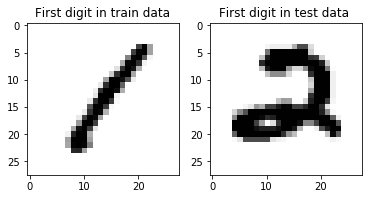

In [45]:
# Let's visualize the image represented by the first rows of both train and test data
train_data_digit1 = np.asarray(mnist_train.iloc[0:1,1:]).reshape(28,28)
test_data_digit1 = np.asarray(mnist_test.iloc[0:1,]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(train_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in train data")
plt.subplot(1,2,2)
plt.imshow(test_data_digit1,cmap = plt.cm.gray_r)
plt.title("First digit in test data ")

In [46]:
"""Let us now assign the label column value to a new variable Y_train 
and the remaining column values to X_train"""
X_train = mnist_train.iloc[:10500,1:]
Y_train = mnist_train.iloc[:10500,0:1]

In [47]:
from sklearn.neural_network import MLPClassifier
# Let us now create a machine learning model to learn from train data
# We shall use a simple 1 layer 50 node neural network to learn this. 
nn_model = MLPClassifier(hidden_layer_sizes=(50))
# The fit method initiates the learning process. When its execution completes, the model is learnt
nn_model.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [48]:
print(nn_model.predict(mnist_test.iloc[0:1,]))

[2]


In [49]:
print("Accuracy of model:", nn_model.score(X_train,Y_train))

Accuracy of model: 0.9697142857142858


In [50]:
predicted_digit = nn_model.predict(X_train)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_train,predicted_digit),
             index=range(0,10),columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,1021,0,0,3,0,0,2,0,9,1
1,0,1139,3,2,0,0,0,0,14,1
2,1,1,1052,5,2,0,3,10,13,2
3,1,0,6,1011,0,9,0,0,27,3
4,0,0,3,1,965,0,0,11,32,4
5,0,0,0,29,1,909,4,0,15,1
6,0,0,1,1,1,0,1049,0,5,0
7,2,0,7,1,0,1,0,1044,18,24
8,0,0,0,7,0,1,1,0,985,0
9,0,0,1,6,0,0,0,0,22,1007
